In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

## Regularized Regression
### Now that you have your data, do the following:

In [2]:
# Split your data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a ridge regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Calculate the RMSE and R^2 for your ridge regression.
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R^2:", ridge_r2)

Ridge Regression RMSE: 0.14410020171824725
Ridge Regression R^2: 0.9984722762470866


In [3]:
# Create and fit Lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calculate RMSE and R^2 for Lasso regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R^2:", lasso_r2) 

Lasso Regression RMSE: 1.2984978990079017
Lasso Regression R^2: 0.8759496036905758


## Visualizing Ridge vs Regression

### Coefficient Bar Plot

<function matplotlib.pyplot.show(close=None, block=None)>

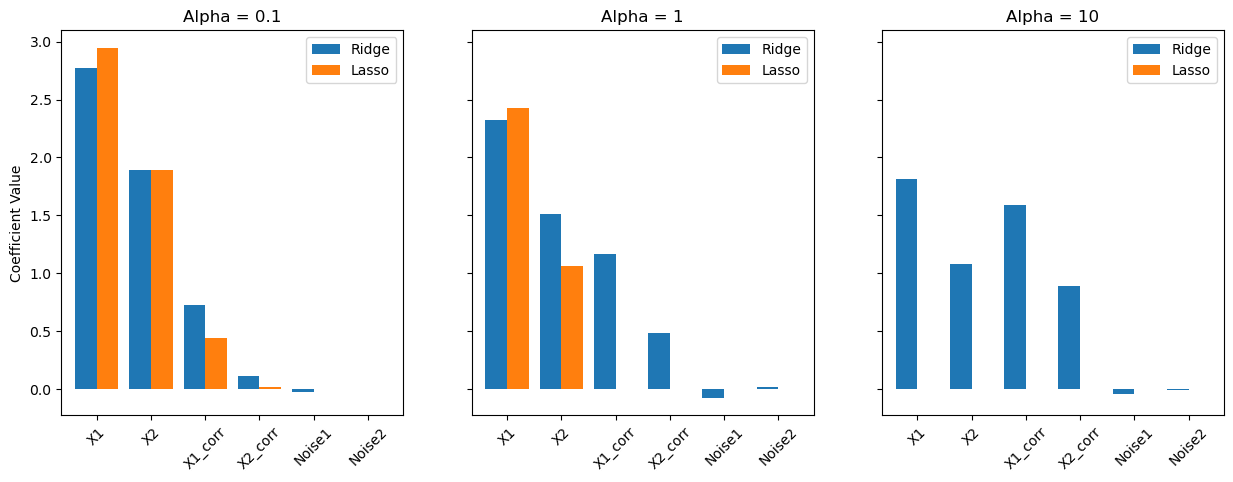

In [4]:
alphas = [0.1, 1, 10]
data = []

for alpha in alphas: 
    ridge = Ridge(alpha=alpha).fit(X, y)
    lasso = Lasso(alpha = alpha).fit(X, y)
    
    data.append(pd.DataFrame({
        "Ridge": ridge.coef_,
        "Lasso": lasso.coef_
    }, index = ["X1", "X2", "X1_corr", "X2_corr", "Noise1", "Noise2"]))
    
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
for i, df in enumerate(data):
    df.plot.bar(ax = axes[i], width = 0.8)
    axes[i].set_title(f"Alpha = {alphas[i]}")
    axes[i].set_xticklabels(df.index, rotation = 45)
    axes[i].set_ylabel("Coefficient Value")

plt.show

In [5]:
# Function for generating plot
def update_alphas(alpha, model_type):
    if model_type == 'Lasso':
        model = Lasso(alpha = alpha)
    else:
        model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    plt.figure(figsize = (10,5))
    plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5, label = f'Predictions (alpha = {alpha})')
    plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--',lw =2)
    plt.title(f'{model_type} Reression: Predictions vs Actual (alpha={alpha})')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.figtext(0.5, -.05, f'RMSe: {rmse}, R2: {r2}', ha = "center", fontsize = 12, bbox= {"facecolor": "orange"})
    plt.show()
#Create interactive widgets
alpha_slider = FloatLogSlider(value = 1.0, base = 10, min = -3, max = 3, step = 0.1, description=  'Alpha')
model_selector = {'Lasso Model': 'Lasso', 'Ridge': 'Ridge'}

In [6]:
interact(update_alphas, alpha = alpha_slider, model_type = model_selector)

interactive(children=(FloatLogSlider(value=1.0, description='Alpha', max=3.0, min=-3.0), Dropdown(description=…

<function __main__.update_alphas(alpha, model_type)>